# Define the DataVisualization class for visualizing stock data

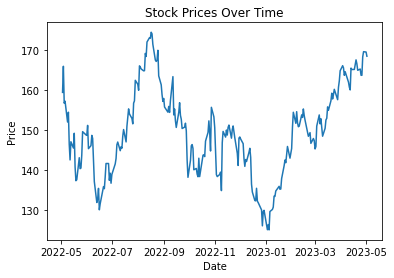

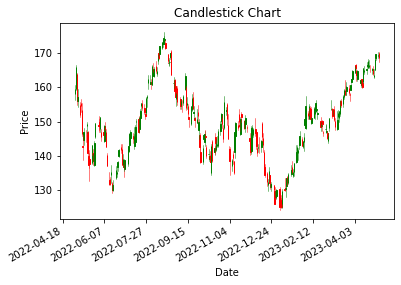

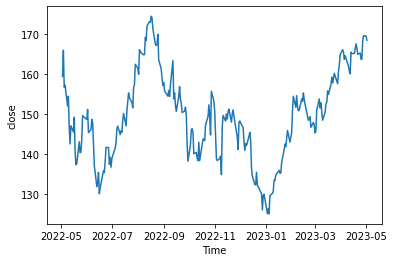

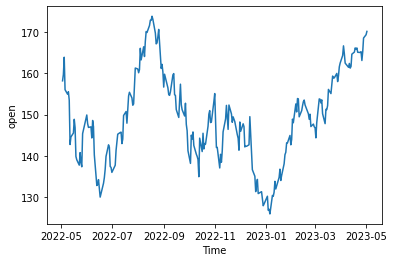

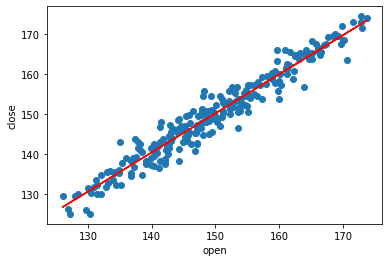

MSE: 6.718447171822981, T-Statistic: -0.24867162398384282, P-Value: 0.8037169065419512


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter, date2num
from mpl_finance import candlestick_ohlc
from matplotlib.dates import date2num

class DataVisualization:
    def __init__(self, csv_file):
        self.df = pd.read_csv(csv_file)
        self.df['date'] = pd.to_datetime(self.df['date'])
        self.df.set_index('date', inplace=True)

    def plot_line_chart(self):
        # Code to plot line chart of stock prices
        try:
            plt.plot(self.df.index, self.df['close'])
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.title('Stock Prices Over Time')
            plt.show()
        except KeyError:
            print("Error: 'date' or 'close' column not found in stock data")

    def plot_candlestick_chart(self):
        try:
            ohlc = self.df[['open', 'high', 'low', 'close']].reset_index()
            ohlc['date'] = ohlc['date'].apply(date2num)
            fig, ax = plt.subplots()
            candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red')
            date_format = DateFormatter('%Y-%m-%d')
            ax.xaxis.set_major_formatter(date_format)
            fig.autofmt_xdate()
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.title('Candlestick Chart')
            plt.show()
        except Exception as e:
            print(str(e))


    def visualize(self, feature):
        plt.plot(self.df[feature])
        plt.xlabel('Time')
        plt.ylabel(feature)
        plt.show()

    def linear_regression(self, x_col, y_col):
        x = self.df[x_col].values.reshape(-1, 1)
        y = self.df[y_col].values.reshape(-1, 1)
        from sklearn.linear_model import LinearRegression
        regressor = LinearRegression()
        regressor.fit(x, y)
        y_pred = regressor.predict(x)
        plt.scatter(x, y)
        plt.plot(x, y_pred, color='red')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()

    def calculate_mse(self, x_col, y_col):
        x = self.df[x_col]
        y = self.df[y_col]
        y_pred = np.polyval(np.polyfit(x, y, 1), x)
        mse = np.mean((y - y_pred) ** 2)
        return mse

    def t_test(self, x_col, y_col):
        x = self.df[x_col]
        y = self.df[y_col]
        from scipy.stats import ttest_ind
        t_stat, p_val = ttest_ind(x, y)
        return (t_stat, p_val)

# Example Output:

dv = DataVisualization('stock_data.csv')

dv.plot_line_chart()
dv.plot_candlestick_chart()
dv.visualize('close')
dv.visualize('open')
dv.linear_regression('open', 'close')
mse = dv.calculate_mse('open', 'close')
t_stat, p_val = dv.t_test('open', 'close')
print(f"MSE: {mse}, T-Statistic: {t_stat}, P-Value: {p_val}")


# Define the TechnicalAnalysis class for performing technical analysis on stock data

In [41]:
import pandas as pd

class TechnicalAnalysis:
    def __init__(self, stock_data):
        if not isinstance(stock_data, pd.DataFrame):
            raise TypeError("stock_data must be a pandas DataFrame")
        self.stock_data = stock_data
    
    def calculate_moving_average(self, window_size):
        try:
            return pd.Series(self.stock_data['close']).rolling(window_size).mean()
        except KeyError:
            raise KeyError("stock_data must contain a 'close' column")
        except Exception as e:
            raise Exception(f"An error occurred while calculating the moving average: {e}")
    
    def calculate_rsi(self, window_size):
        try:
            delta = self.stock_data['close'].diff()
            gain = delta.where(delta > 0, 0)
            loss = -delta.where(delta < 0, 0)
            avg_gain = gain.rolling(window_size).mean()
            avg_loss = loss.rolling(window_size).mean()
            rs = avg_gain / avg_loss
            return 100 - (100 / (1 + rs))
        except KeyError:
            raise KeyError("stock_data must contain a 'close' column")
        except Exception as e:
            raise Exception(f"An error occurred while calculating the RSI: {e}")
    
    def calculate_macd(self):
        try:
            ema_12 = self.stock_data['close'].ewm(span=12, adjust=False).mean()
            ema_26 = self.stock_data['close'].ewm(span=26, adjust=False).mean()
            macd = ema_12 - ema_26
            signal = macd.ewm(span=9, adjust=False).mean()
            return macd, signal
        except KeyError:
            raise KeyError("stock_data must contain a 'close' column")
        except Exception as e:
            raise Exception(f"An error occurred while calculating the MACD: {e}")

# Load the stock data from a CSV file
try:
    stock_data = pd.read_csv('stock_data.csv')
except FileNotFoundError:
    print("Error: 'stock_data.csv' file not found")
    exit()
except pd.errors.EmptyDataError:
    print("Error: 'stock_data.csv' file is empty")
    exit()
except pd.errors.ParserError:
    print("Error: 'stock_data.csv' file could not be parsed")
    exit()
    
# Create an instance of the TechnicalAnalysis class with stock_data
ta = TechnicalAnalysis(stock_data)

In [42]:
# Calculate the moving average with a window size of 20 days
moving_average = ta.calculate_moving_average(20)
moving_average

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
246    164.290501
247    164.672501
248    165.038500
249    165.273000
250    165.391500
Name: close, Length: 251, dtype: float64

In [43]:
# Calculate the RSI with a window size of 14 days
rsi = ta.calculate_rsi(14)
rsi

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
246    50.000000
247    58.549934
248    68.595047
249    72.619667
250    71.334665
Name: close, Length: 251, dtype: float64

In [44]:
# Calculate the MACD
macd, signal = ta.calculate_macd()
macd, signal

(0      0.000000
 1      0.521710
 2      0.186620
 3     -0.037358
 4     -0.628824
          ...   
 246    2.211950
 247    2.363470
 248    2.556558
 249    2.671523
 250    2.647390
 Name: close, Length: 251, dtype: float64,
 0      0.000000
 1      0.104342
 2      0.120798
 3      0.089166
 4     -0.054432
          ...   
 246    2.756183
 247    2.677640
 248    2.653424
 249    2.657044
 250    2.655113
 Name: close, Length: 251, dtype: float64)

# Define the FinancialMetrics class for calculating financial metrics from stock data

In [1]:
import pandas as pd

class FinancialMetrics:
    def __init__(self, stock_data, financial_statements):
        if not isinstance(stock_data, pd.DataFrame):
            raise TypeError("stock_data must be a pandas DataFrame")
        if not isinstance(financial_statements, pd.DataFrame):
            raise TypeError("financial_statements must be a pandas DataFrame")
        self.stock_data = stock_data
        self.financial_statements = financial_statements
    
    def calculate_pe_ratio(self):
        try:
            average_close = self.stock_data['close'].mean()
            return average_close / self.financial_statements['Basic EPS']
        except KeyError:
            raise KeyError("stock_data or financial_statements is missing a required column")
        except Exception as e:
            raise Exception(f"An error occurred while calculating the P/E ratio: {e}")
    
    def calculate_ps_ratio(self):
        try:
            average_close = self.stock_data['close'].mean()
            basic_average_shares = int(self.financial_statements['Basic Average Shares'].iloc[-1])
            market_cap = average_close * basic_average_shares
            total_revenue = self.financial_statements['Total Revenue'].iloc[-1]
            financial_statements['Total Revenue'] = financial_statements['Total Revenue'].astype(float)
            return market_cap / total_revenue
        except KeyError:
            raise KeyError("stock_data or financial_statements is missing a required column")
        except IndexError:
            raise IndexError("stock_data or financial_statements is empty")
        except Exception as e:
            raise Exception(f"An error occurred while calculating the P/S ratio: {e}")
            
    def calculate_total_return(self):
        try:
            initial_price = self.stock_data['open'].iloc[0]
            final_price = self.stock_data['close'].iloc[-1]
            total_return = (final_price - initial_price) / initial_price
            return total_return
        except Exception as e:
            print("Error calculating total return:", e)

In [2]:
# Read in the stock data and financial statements from a CSV file
stock_data = pd.read_csv('stock_data.csv')
financial_statements = pd.read_csv('financial_statements.csv')

# create FinancialMetrics instance
fm = FinancialMetrics(stock_data, financial_statements)

In [3]:
# Test calculate_pe_ratio method
try:
    pe_ratio = fm.calculate_pe_ratio()
    print("P/E ratio:", pe_ratio.item())
except Exception as e:
    print("Error calculating P/E ratio:", e)

P/E ratio: 24.335341523661448


In [4]:
# Test calculate_ps_ratio method
try:
    ps_ratio = fm.calculate_ps_ratio()
    print("P/S ratio:", ps_ratio)
except Exception as e:
    print("Error calculating P/S ratio:", e)

P/S ratio: 6.154569637716202


In [49]:
# Test calculate_total_return method
try:
    total_return = fm.calculate_total_return()
    print("Total return:", total_return)
except Exception as e:
    print("Error calculating total return:", e)

Total return: 0.06569711915385856
